In [9]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv(r"C:\Users\UTKARSH\Downloads\goibibo_flights_data.csv")

In [11]:
data.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [12]:
data.shape

(300261, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
data.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [16]:
#dropping columns with no data
data.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [17]:
data.describe()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,2,6,251,6,266,483,12170,40
top,20-07-2023,Vistara,UK-706,economy,Delhi,07:00,Mumbai,19:55,02h 10m,"55,427",1-stop
freq,6633,127859,3235,206774,61345,8760,59109,9194,4242,1445,243603


In [18]:
#Split Date,Month,Year separately from flight date
data['Date']=data['flight date'].str.split('-').str[0]
data['Month']=data['flight date'].str.split('-').str[1]
data['Year']=data['flight date'].str.split('-').str[2]

In [19]:
#changing data type for Date,Month,Year
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [20]:
#dropping flight data column
data.drop(['flight date'],axis=1, inplace=True)

In [21]:
#Split dep_time and arr_time
data['Departure Hour']=data['dep_time'].str.split(':').str[0]
data['Departure Minutes']=data['dep_time'].str.split(':').str[1]
data['Arrival Hour']=data['arr_time'].str.split(':').str[0]
data['Arrival Minutes']=data['arr_time'].str.split(':').str[1]

In [22]:
#changing data type for dep_time and arr_time
data['Departure Hour']=data['Departure Hour'].astype(int)
data['Departure Minutes']=data['Departure Minutes'].astype(int)
data['Arrival Hour']=data['Arrival Hour'].astype(int)
data['Arrival Minutes']=data['Arrival Minutes'].astype(int)

In [23]:
data.head()

,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Date,Month,Year,Departure Hour,Departure Minutes,Arrival Hour,Arrival Minutes
0,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,26,6,2023,18,55,21,5
1,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,26,6,2023,6,20,8,40
2,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,26,6,2023,4,25,6,35
3,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,26,6,2023,10,20,12,35
4,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,26,6,2023,8,50,11,10


In [24]:
#dropping column dep_time and arr_time
data.drop(['dep_time','arr_time'],axis=1, inplace=True)

In [25]:
#Split duration
data['Duration hour']=data['duration'].str.split(' ').str[0].str.split('h').str[0]
data['Duration minutes']=data['duration'].str.split(' ').str[1].str.split('m').str[0]

In [26]:
#changing data type
data['Duration hour'] = pd.to_numeric(data['Duration hour'], errors='coerce').fillna(0).astype(int)
data['Duration minutes'] = pd.to_numeric(data['Duration minutes'], errors='coerce').fillna(0).astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   airline            300261 non-null  object
 1   flight_num         300261 non-null  object
 2   class              300261 non-null  object
 3   from               300261 non-null  object
 4   to                 300261 non-null  object
 5   duration           300261 non-null  object
 6   price              300261 non-null  object
 7   stops              300261 non-null  object
 8   Date               300261 non-null  int32 
 9   Month              300261 non-null  int32 
 10  Year               300261 non-null  int32 
 11  Departure Hour     300261 non-null  int32 
 12  Departure Minutes  300261 non-null  int32 
 13  Arrival Hour       300261 non-null  int32 
 14  Arrival Minutes    300261 non-null  int32 
 15  Duration hour      300261 non-null  int32 
 16  Duration minutes   3

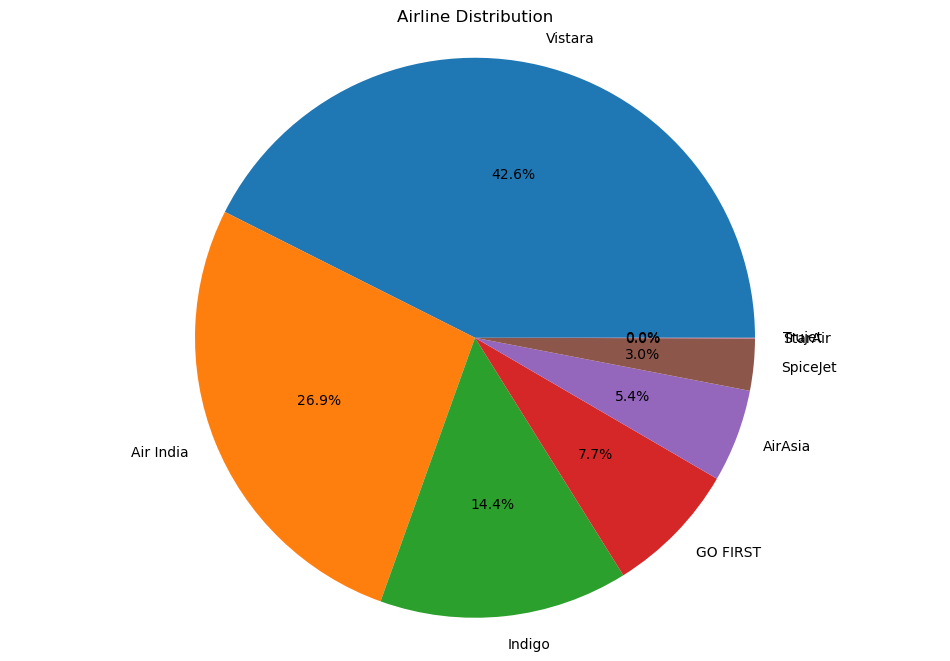

In [49]:
#Creating Pie Chart
import matplotlib.pyplot as plt
import seaborn as sns

airline_counts=data['airline'].value_counts()

plt.figure(figsize=(12,8))
plt.pie(airline_counts,labels=airline_counts.index,autopct='%1.1f%%')
plt.title('Airline Distribution')
plt.axis('equal')
plt.show()

In [54]:
data['price'].value_counts()

price
55,427    1445
2,362     1442
55,504    1390
61,893    1383
61,416    1230
          ... 
15,950       1
17,482       1
19,292       1
9,216        1
7,893        1
Name: count, Length: 12170, dtype: int64

In [55]:
data['price']=data['price'].str.replace(',','').astype(int)

In [61]:
data['price'].unique()

array([ 6013,  6016,  6015, ..., 75852, 15225, 78262])

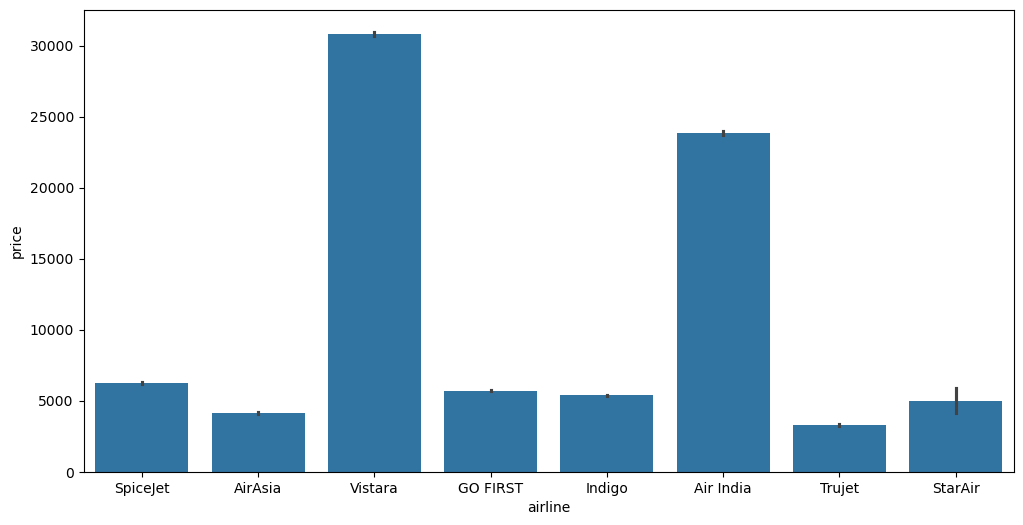

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(data=data,x='airline',y='price')
plt.show()

In [65]:
data['stops'].unique()

array(['non-stop', '1-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n

In [67]:
data['stops']=data['stops'].map({'non-stop':0,'1-stop':1,'2+-stop':2})

In [69]:
data['stops'].unique()

array([ 0.,  1., nan,  2.])

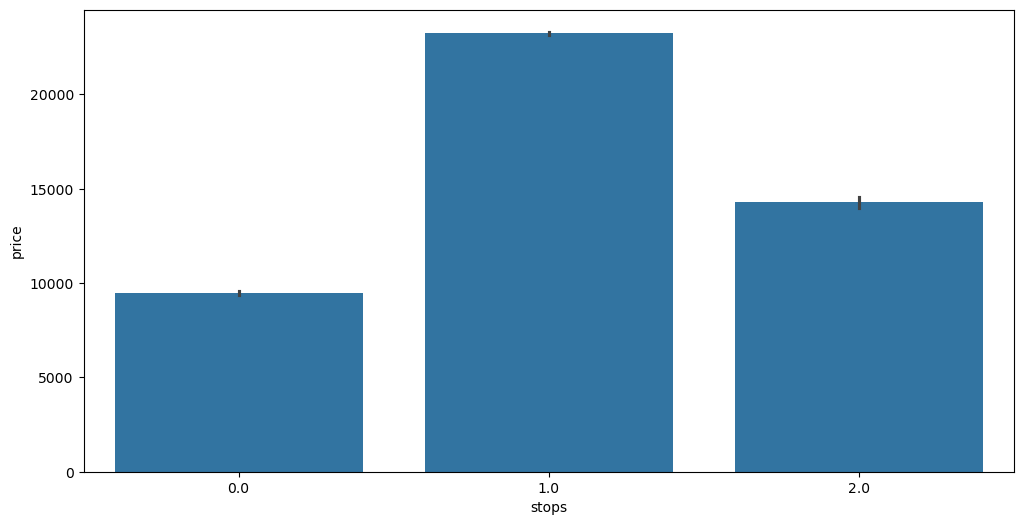

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(data=data,x='stops',y='price')
plt.show()